# Import data Change to Categoric, memory

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from google.colab import drive
drive.mount('/content/gdrive/')

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix


from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import KFold, StratifiedKFold, train_test_split

import warnings
warnings.filterwarnings("ignore")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
data = pd.read_csv('/content/gdrive/My Drive/Prudential Data Kaggle/train.csv')
id = data['Id']
data = data.drop(columns='Id')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 57.5+ MB
None


,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
len(id.unique())

59381

# Sedikit Feature Engineering

In [0]:
data_ori = data.copy()

[(-0.001, 0.411], (0.411, 0.501], (0.501, 1.0]]
Categories (3, interval[float64]): [(-0.001, 0.411] < (0.411, 0.501] < (0.501, 1.0]]

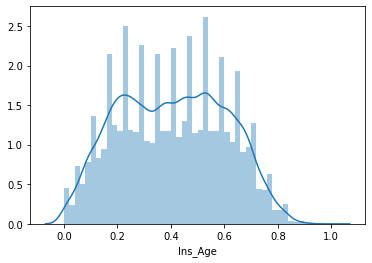

In [0]:
sns.distplot(data['Ins_Age'])

data['ins_age_categ'] = pd.qcut(data['Ins_Age'],q=3)
bins = data['ins_age_categ'].unique()
data['ins_age_categ']=data['ins_age_categ'].replace(bins[0],'tinggi')
data['ins_age_categ']=data['ins_age_categ'].replace(bins[1],'rendah')
data['ins_age_categ']=data['ins_age_categ'].replace(bins[2],'sedang')
bins

data['Ht_categ'] = pd.qcut(data['Ht'],q=3,)
bins = data['Ht_categ'].unique()
data['Ht_categ']=data['Ht_categ'].replace(bins[0],'kecil')
data['Ht_categ']=data['Ht_categ'].replace(bins[1],'sedang')
data['Ht_categ']=data['Ht_categ'].replace(bins[2],'tinggi')
bins


data['Wt_categ'] = pd.qcut(data['Wt'],q=3)
bins = data['Wt_categ'].unique()
data['Wt_categ']=data['Wt_categ'].replace(bins[0],'kecil')
data['Wt_categ']=data['Wt_categ'].replace(bins[1],'sedang')
data['Wt_categ']=data['Wt_categ'].replace(bins[2],'tinggi')
bins

data['BMI_categ'] = pd.qcut(data['BMI'],q=3)
bins = data['BMI_categ'].unique()
data['BMI_categ']=data['BMI_categ'].replace(bins[0],'kecil')
data['BMI_categ']=data['BMI_categ'].replace(bins[1],'sedang')
data['BMI_categ']=data['BMI_categ'].replace(bins[2],'tinggi')
bins

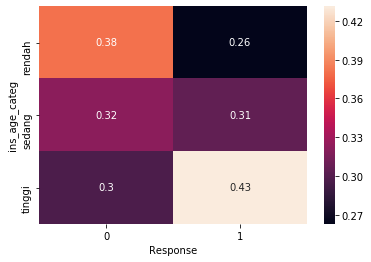

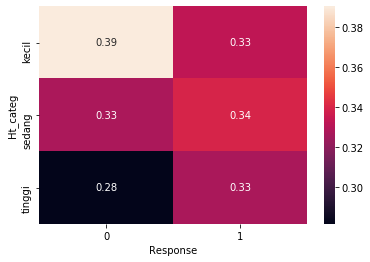

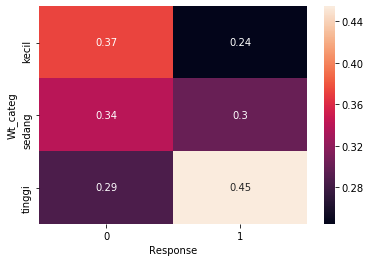

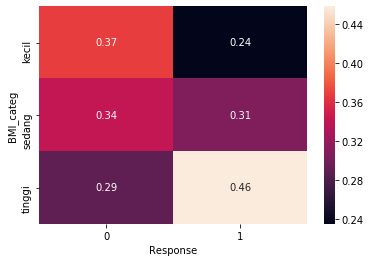

In [0]:
categ_age_bmi_dkk = ['ins_age_categ','Ht_categ','Wt_categ','BMI_categ']
for i,col in enumerate(categ_age_bmi_dkk):
  pr = pd.crosstab(data[col],data['Response'],normalize='columns')
  sns.heatmap(pr,annot=True)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

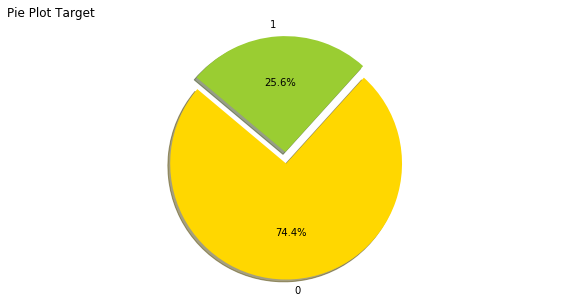

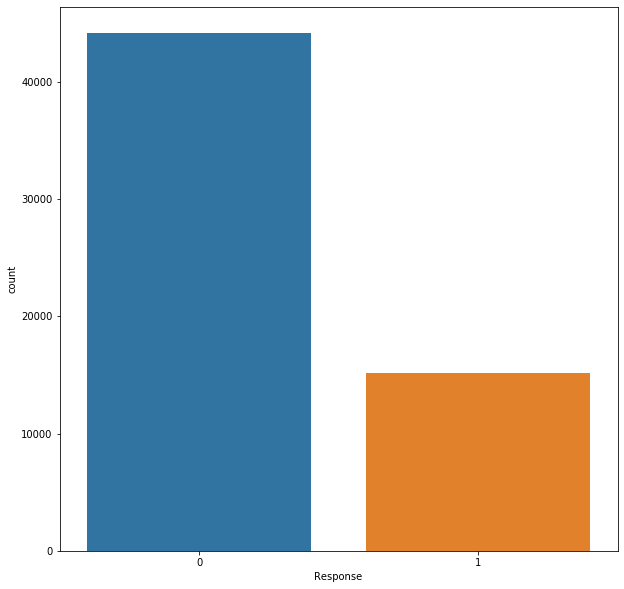

In [0]:
target = pd.DataFrame(data['Response'].value_counts())
target.columns=['count']

plt.figure(figsize=(10,10))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(target['count'], explode=explode, labels=target.index, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.subplots_adjust(wspace=0.2,hspace=1,top=0.5)
plt.title('Pie Plot Target',loc='left')
plt.axis('equal')
plt.show()




plt.figure(figsize=(10,10))
sns.countplot(data['Response'])

plt.show()

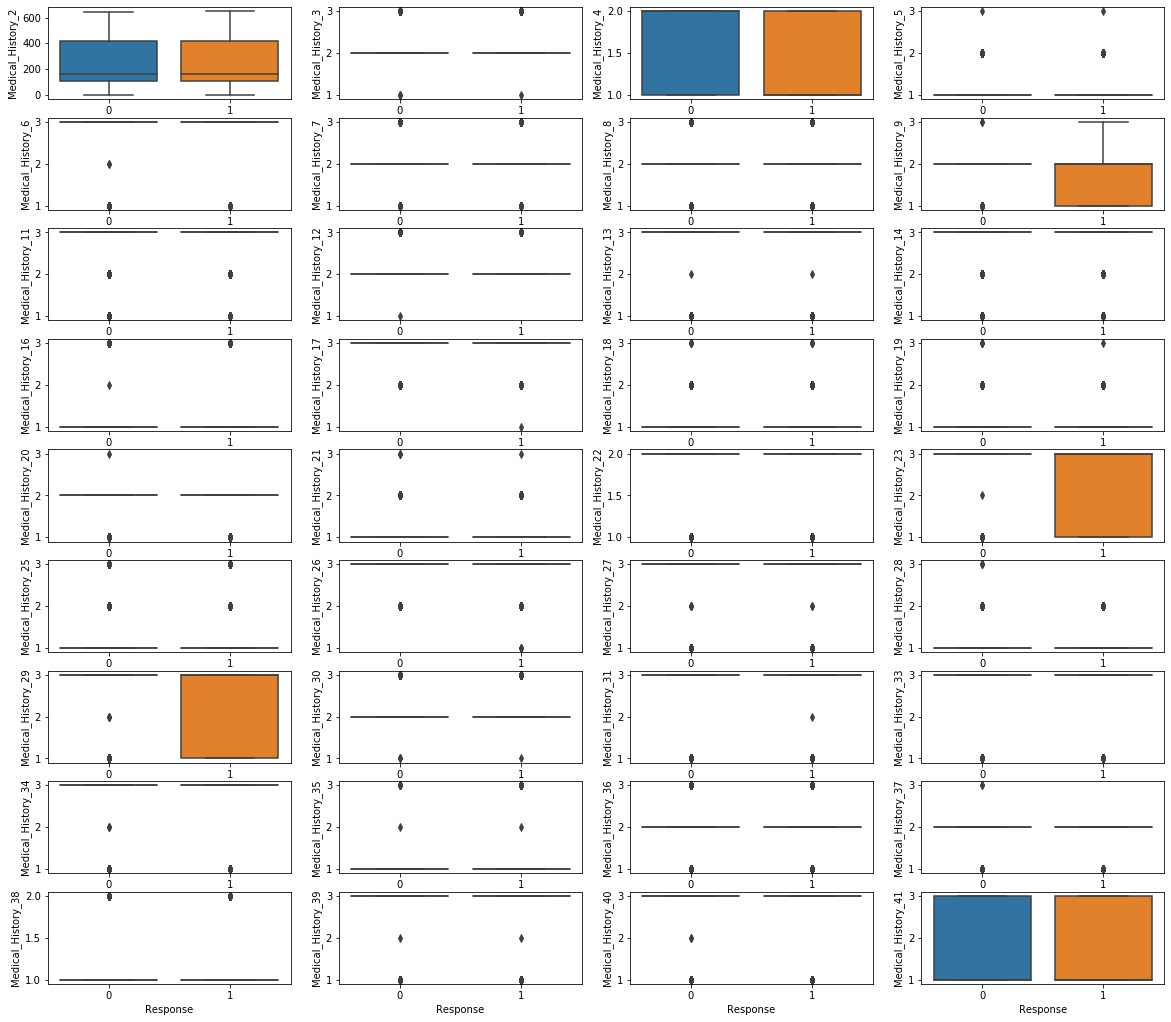

In [0]:
medical_hist_ord = fnmatch.filter(data.columns, 'Medical_History*')
medical_hist_ord = [x for x in medical_hist_ord if x not in ['Medical_History_1','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']]

nice_feature = ['Medical_History_9','Medical_History_23','Medical_History_29']

f=plt.figure(figsize=(20,20))
for i,col in enumerate(medical_hist_ord):
  f.add_subplot(10,4,i+1)
  sns.boxplot(x='Response',y=col,data=data)

In [0]:
# data.drop(columns=['Product_Info_mean'],inplace=True)

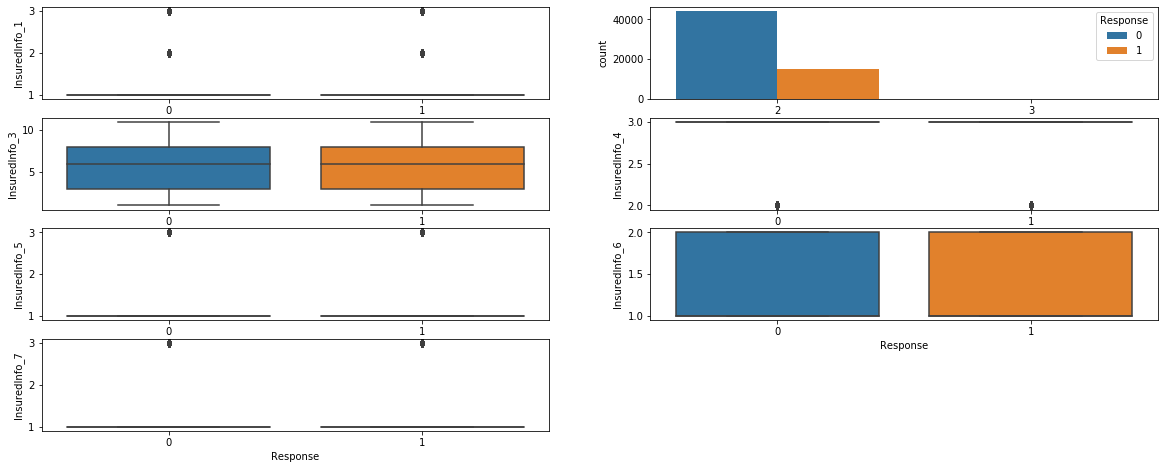

In [0]:
insurance_info_ord = fnmatch.filter(data.columns, 'InsuredInfo*')
# insured_info_ord = [x for x in product_info_ord if x not in ['insured_info_ord']]
f=plt.figure(figsize=(20,20))
for i,col in enumerate(insured_info_ord):
  f.add_subplot(10,2,i+1)
  if i+1==2:
    sns.countplot(data[col],hue=data['Response'])
  else:
    sns.boxplot(x='Response',y=col,data=data)

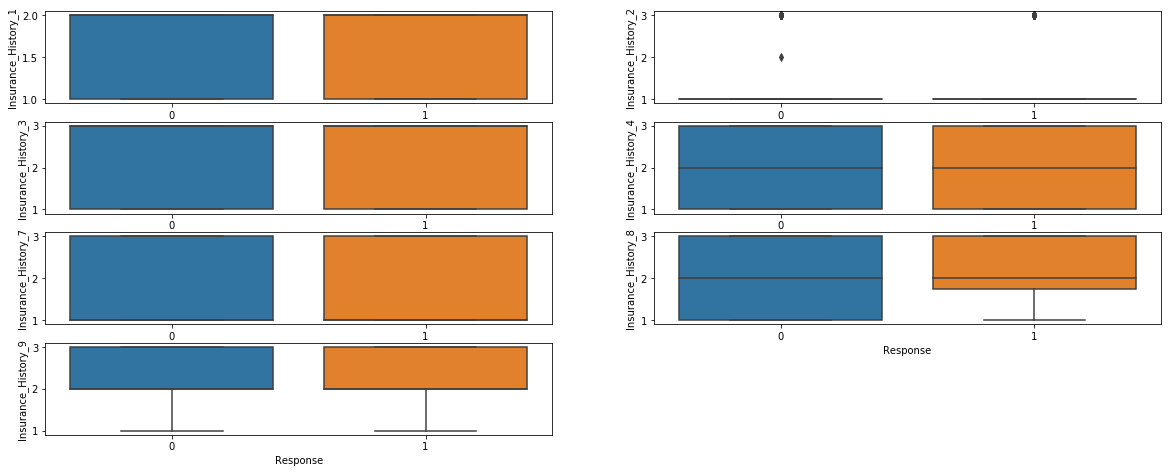

In [0]:
insured_hist_ord = fnmatch.filter(data.columns, 'Insurance_History*')
insured_hist_ord = [x for x in insured_hist_ord if x not in ['Insurance_History_5']]


f=plt.figure(figsize=(20,20))
for i,col in enumerate(insured_hist_ord):
  f.add_subplot(10,2,i+1)
  sns.boxplot(x='Response',y=col,data=data)

nice_feature.append('Insurance_History_8')

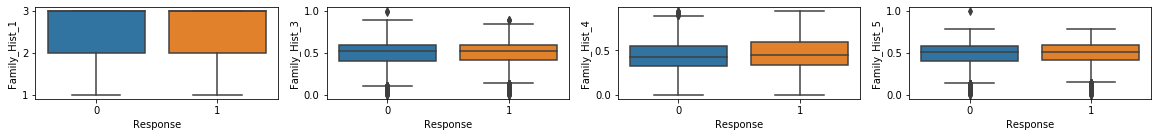

In [0]:
family_hist_ord = fnmatch.filter(data.columns, 'Family_Hist*')
family_hist_ord = [x for x in family_hist_ord if x not in ['Family_Hist_2']]


f=plt.figure(figsize=(20,20))
for i,col in enumerate(family_hist_ord):
  f.add_subplot(10,4,i+1)
  sns.boxplot(x='Response',y=col,data=data)

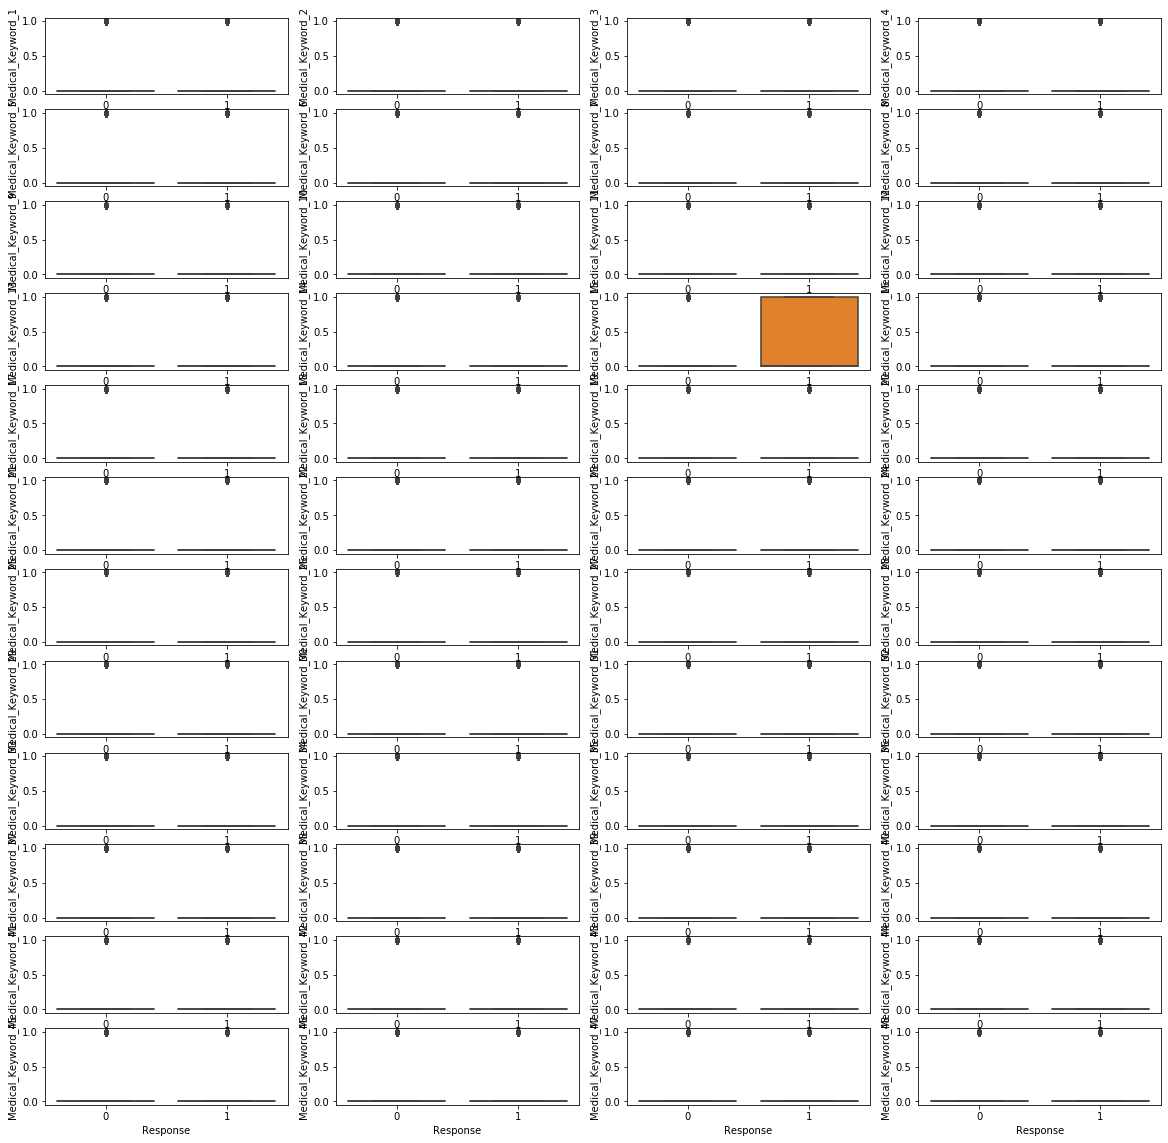

In [0]:
import fnmatch

medical_key = fnmatch.filter(data.columns, 'Medical_Keyword*')
data['Medical_Keyword_sum'] = data[medical_key].sum(axis=1)


f=plt.figure(figsize=(20,20))
for i,col in enumerate(medical_key):
  
  f.add_subplot(12,4,i+1)
  sns.boxplot(x='Response',y=col,data=data)

nice_feature.append('Medical_Keyword_15')

data.drop(columns=medical_key,inplace=True)
# f= plt.figure(figsize=(20,10))
# f.add_subplot(2,2,1)
# sns.countplot(x='Medical_Keyword_1',hue='Response',data=data)
# f.add_subplot(2,2,2)
# sns.countplot(x='Medical_Keyword_sum',hue='Response',data=data)

# f.add_subplot(2,2,3)
# sns.boxplot(x='Response',y='Medical_Keyword_sum',data=data)

# f.add_subplot(2,2,4)
# sns.distplot(data['Medical_Keyword_sum'][data['Response']==0],label='Class 0')
# sns.distplot(data['Medical_Keyword_sum'][data['Response']==1],label='Class 1')
# plt.legend()
# plt.show()

In [0]:
categ = medical_hist_ord.copy()
categ.extend(insurance_info_ord)
categ.extend(insured_hist_ord)
categ.extend(family_hist_ord)
categ

['Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_16',
 'Medical_History_17',
 'Medical_History_18',
 'Medical_History_19',
 'Medical_History_20',
 'Medical_History_21',
 'Medical_History_22',
 'Medical_History_23',
 'Medical_History_25',
 'Medical_History_26',
 'Medical_History_27',
 'Medical_History_28',
 'Medical_History_29',
 'Medical_History_30',
 'Medical_History_31',
 'Medical_History_33',
 'Medical_History_34',
 'Medical_History_35',
 'Medical_History_36',
 'Medical_History_37',
 'Medical_History_38',
 'Medical_History_39',
 'Medical_History_40',
 'Medical_History_41',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insu

Index(['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
       'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5'],
      dtype='object')


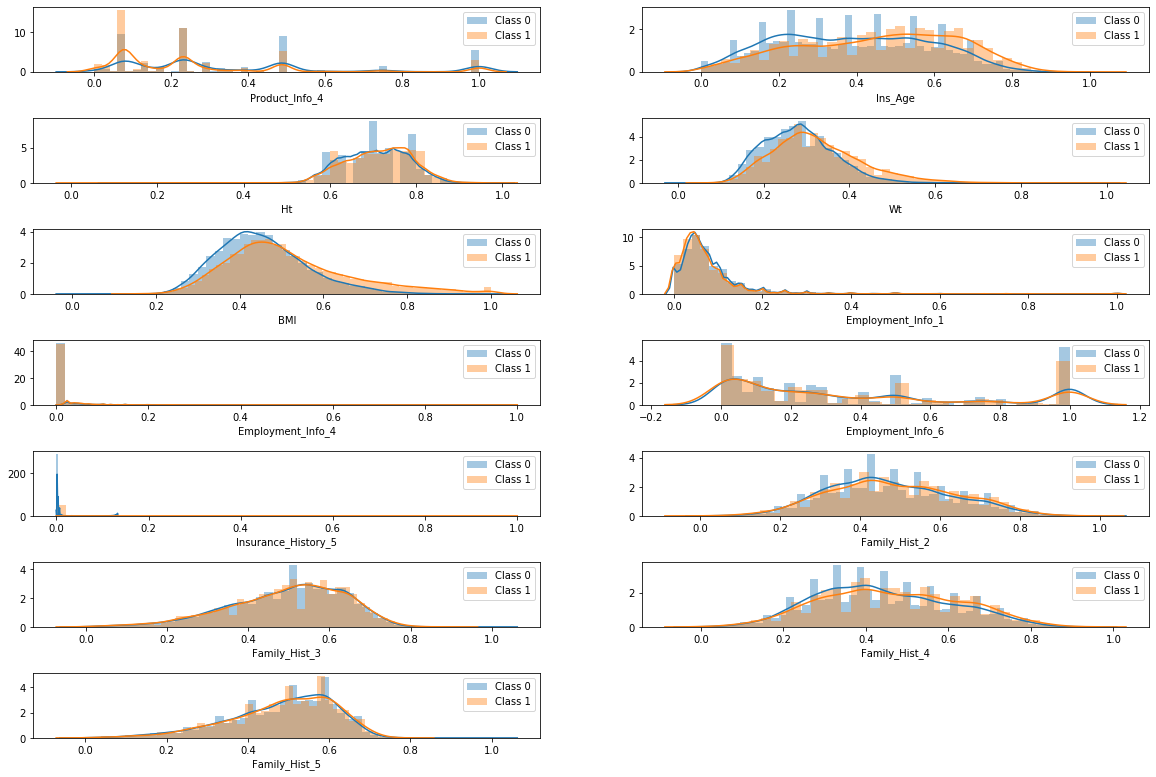

In [0]:
floats = data.select_dtypes(include='float64').drop(columns = ['Medical_History_1','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']).columns
print(floats)
f=plt.figure(figsize=(20,40))
for i,col in enumerate(floats):
  f.add_subplot(20,2,i+1)
  sns.distplot(data[col][data['Response']==0].dropna(),label='Class 0')
  sns.distplot(data[col][data['Response']==1].dropna(),label='Class 1')
  plt.subplots_adjust(hspace=0.7)
  plt.legend()
 
plt.show()

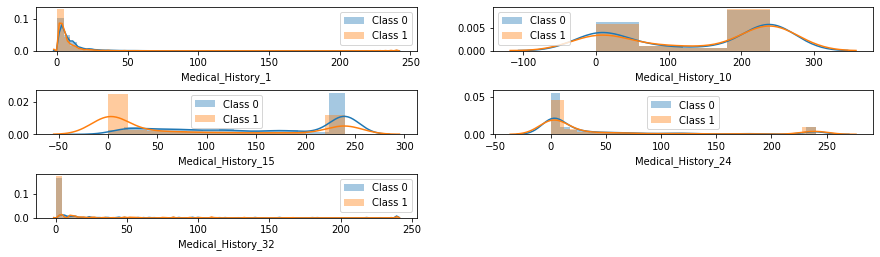

In [0]:
diskrit = ['Medical_History_1','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']
f=plt.figure(figsize=(15,30))
for i,col in enumerate(diskrit):
  
  f.add_subplot(20,2,i+1)
  sns.distplot(data[col][data['Response']==0].dropna(),label='Class 0')
  sns.distplot(data[col][data['Response']==1].dropna(),label='Class 1')
  plt.subplots_adjust(hspace=0.9)
  plt.legend()

In [0]:
nice_feature.append('Medical_History_15')

In [0]:
# data.drop(columns='Medical_History_dis_agg',inplace=True)


In [0]:
def add_new_col(data_feature_engineering,test,columns):
  for col in columns:
    try:
      #Mean
      data_feature_engineering['{}_mean'.format(col)]=pd.qcut(data_feature_engineering[col],q=10)
      bins = data_feature_engineering[[col,'{}_mean'.format(col)]].groupby('{}_mean'.format(col)).mean()
      a = bins.to_dict()[col]
      data_feature_engineering['{}_mean'.format(col)]=data_feature_engineering['{}_mean'.format(col)].map(a).astype('float32')
      
      test['{}_mean'.format(col)]=pd.qcut(data_feature_engineering[col],q=10)
      bins = test[[col,'{}_mean'.format(col)]].groupby('{}_mean'.format(col)).mean()
      a = bins.to_dict()[col]
      test['{}_mean'.format(col)]=test['{}_mean'.format(col)].map(a).astype('float32')

      # Median
      data_feature_engineering['{}_median'.format(col)]=pd.qcut(data_feature_engineering[col],q=10)
      bins = data_feature_engineering[[col,'{}_median'.format(col)]].groupby('{}_median'.format(col)).median()
      a = bins.to_dict()[col]
      data_feature_engineering['{}_median'.format(col)]=data_feature_engineering['{}_median'.format(col)].map(a).astype('float32')

      test['{}_median'.format(col)]=pd.qcut(data_feature_engineering[col],q=10)
      bins = test[[col,'{}_median'.format(col)]].groupby('{}_median'.format(col)).median()
      a = bins.to_dict()[col]
      test['{}_median'.format(col)]=test['{}_median'.format(col)].map(a).astype('float32')

      #Min
      data_feature_engineering['{}_min'.format(col)]=pd.qcut(data_feature_engineering[col],q=10)
      bins = data_feature_engineering[[col,'{}_min'.format(col)]].groupby('{}_min'.format(col)).min()
      a = bins.to_dict()[col]
      data_feature_engineering['{}_min'.format(col)]=data_feature_engineering['{}_min'.format(col)].map(a).astype('float32')
      
      test['{}_min'.format(col)]=pd.qcut(data_feature_engineering[col],q=10)
      bins = test[[col,'{}_min'.format(col)]].groupby('{}_min'.format(col)).min()
      a = bins.to_dict()[col]
      test['{}_min'.format(col)]=test['{}_min'.format(col)].map(a).astype('float32')

      # Max
      data_feature_engineering['{}_max'.format(col)]=pd.qcut(data_feature_engineering[col],q=10)
      bins = data_feature_engineering[[col,'{}_max'.format(col)]].groupby('{}_max'.format(col)).max()
      a = bins.to_dict()[col]
      data_feature_engineering['{}_max'.format(col)]=data_feature_engineering['{}_max'.format(col)].map(a).astype('float32')

      test['{}_max'.format(col)]=pd.qcut(data_feature_engineering[col],q=10)
      bins = test[[col,'{}_max'.format(col)]].groupby('{}_max'.format(col)).max()
      a = bins.to_dict()[col]
      test['{}_max'.format(col)]=test['{}_max'.format(col)].map(a).astype('float32')

      # quantile 1
      data_feature_engineering['{}_q1'.format(col)]=pd.qcut(data_feature_engineering[col],q=10)
      bins = data_feature_engineering[[col,'{}_q1'.format(col)]].groupby('{}_q1'.format(col)).quantile(0.25)
      a = bins.to_dict()[col]
      data_feature_engineering['{}_q1'.format(col)]=data_feature_engineering['{}_q1'.format(col)].map(a).astype('float32')

      test['{}_q1'.format(col)]=pd.qcut(data_feature_engineering[col],q=10)
      bins = test[[col,'{}_q1'.format(col)]].groupby('{}_q1'.format(col)).quantile(0.25)
      a = bins.to_dict()[col]
      test['{}_q1'.format(col)]=test['{}_q1'.format(col)].map(a).astype('float32')

      # quantile 3
      data_feature_engineering['{}_q3'.format(col)]=pd.qcut(data_feature_engineering[col],q=10)
      bins = data_feature_engineering[[col,'{}_q3'.format(col)]].groupby('{}_q3'.format(col)).quantile(0.75)
      a = bins.to_dict()[col]
      data_feature_engineering['{}_q3'.format(col)]=data_feature_engineering['{}_q3'.format(col)].map(a).astype('float32')

      test['{}_q3'.format(col)]=pd.qcut(data_feature_engineering[col],q=10)
      bins = test[[col,'{}_q3'.format(col)]].groupby('{}_q3'.format(col)).quantile(0.75)
      a = bins.to_dict()[col]
      test['{}_q3'.format(col)]=test['{}_q3'.format(col)].map(a).astype('float32')
      

    except:
      continue

In [0]:
# data3=data.copy()
# test =data3.head(5000)
# add_new_col(data3,test,floats)
# data = data3.copy()

In [0]:
data.shape

(59381, 84)

In [0]:
data_ori.shape

(59381, 127)

# Misisng Values

In [0]:
class drop_na_duplicate_outlier:
  def __init__(self,data):
    self.data = data
  
    
  # check and drop null
  def na(self,threshold=0.2,drop=0):
    null = pd.DataFrame(self.data.isnull().sum().sort_values(ascending=False),columns=['Null'])
    null['percent'] = null['Null']*100/self.data.shape[0]

    # Drop null values > threshold jadi bsa pake model Kek Random Forrest, SVM dst
    drop_null = list(null[null['percent']>threshold].index)
    print('The following column has null value more than {} percent: {} \n'.format(threshold,drop_null))
    if drop==1:
      print('The following column will be removed : {}'.format(drop_null))
      self.data.drop(columns=drop_null,inplace=True)
   
    print('\n')
    print('\n')
  
  # Cek duplicate 
  def duplicate(self,drop=0):
    dupli = self.data[self.data.duplicated()].copy()
    count = dupli.shape[0]
    print('There are {} number of duplicate'.format(count))
    print('Index of duplicate : ',dupli.index)
    print('\n')
    if drop==1:
      print('duplicate will be removed \n')
      self.data.drop(index=dupli.index,inplace=True)
  
  # Extreme Outlier
  def outlier(self,data,column,drop=0):
    for col in column:
      q3 = data[col].quantile(0.75)
      q1 = data[col].quantile(0.25)
      dq = q3-q1
      max_val = q3+3*dq
      min_val = q1-3*dq
      
      row_before = data.shape[0]
      a = data[data[col]>=max_val].shape[0]
      b = data[data[col]<=min_val].shape[0]
      print('there are {} rows with values more than {} and less than {} in {} \n'.format((a+b),str(max_val),str(min_val),str(col)))
      
      if drop==1:
        print('Will drop row in {} with values more than {} and less than {}'.format(col,str(max_val),str(min_val)))
        data = data[data[col]<max_val]
        data = data[data[col]>min_val]
        row_after = data.shape[0]
        print('Row ommited {} \n'.format(str(row_before-row_after)))

In [0]:
null = pd.DataFrame(data_ori.isnull().sum().sort_values(ascending=False),columns=['Null'])
null['percent'] = null['Null']*100/data_ori.shape[0]

null.head(20)
# # Drop null values > threshold jadi bsa pake model Kek Random Forrest, SVM dst
# drop_null = list(null[null['percent']>threshold].index)
# print('The following column has null value more than {} percent: {} \n'.format(threshold,drop_null))
# if drop==1:
#   print('The following column will be removed : {}'.format(drop_null))

,Null,percent
Medical_History_10,58824,99.061990
Medical_History_32,58274,98.135767
Medical_History_24,55580,93.598963
Medical_History_15,44596,75.101463
Family_Hist_5,41811,70.411411
Family_Hist_3,34241,57.663226
Family_Hist_2,28656,48.257860
Insurance_History_5,25396,42.767889
Family_Hist_4,19184,32.306630
Employment_Info_6,10854,18.278574


In [0]:
data3=data.copy()
dno = drop_na_duplicate_outlier(data3)
dno.na(threshold=0.2,drop=1)
dno.duplicate(drop=0)


float_2 = data3.select_dtypes(include='float64')
dno.outlier(data=data3,column=float_2.columns)

The following column has null value more than 0.2 percent: ['Medical_History_10', 'Medical_History_32', 'Medical_History_24', 'Medical_History_15', 'Family_Hist_5', 'Family_Hist_3', 'Family_Hist_2', 'Insurance_History_5', 'Family_Hist_4', 'Employment_Info_6', 'Medical_History_1', 'Employment_Info_4'] 

The following column will be removed : ['Medical_History_10', 'Medical_History_32', 'Medical_History_24', 'Medical_History_15', 'Family_Hist_5', 'Family_Hist_3', 'Family_Hist_2', 'Insurance_History_5', 'Family_Hist_4', 'Employment_Info_6', 'Medical_History_1', 'Employment_Info_4']




There are 45 number of duplicate
Index of duplicate :  Int64Index([17040, 18002, 18522, 19588, 20858, 21651, 21764, 24372, 26143,
            27940, 28786, 29905, 31228, 31276, 31530, 33493, 34291, 34302,
            34303, 38258, 38701, 40064, 41055, 42923, 44076, 45233, 46167,
            46188, 46631, 47259, 48957, 49577, 50966, 51080, 51935, 52219,
            52474, 52934, 54538, 56063, 56227, 56651, 5

In [0]:
data=data3.copy()

In [0]:
data3=data_ori.copy()
dno = drop_na_duplicate_outlier(data3)
dno.na(threshold=0.2,drop=1)
dno.duplicate(drop=0)


float_2 = data3.select_dtypes(include='float64')
dno.outlier(data=data3,column=float_2.columns)

The following column has null value more than 0.2 percent: ['Medical_History_10', 'Medical_History_32', 'Medical_History_24', 'Medical_History_15', 'Family_Hist_5', 'Family_Hist_3', 'Family_Hist_2', 'Insurance_History_5', 'Family_Hist_4', 'Employment_Info_6', 'Medical_History_1', 'Employment_Info_4'] 

The following column will be removed : ['Medical_History_10', 'Medical_History_32', 'Medical_History_24', 'Medical_History_15', 'Family_Hist_5', 'Family_Hist_3', 'Family_Hist_2', 'Insurance_History_5', 'Family_Hist_4', 'Employment_Info_6', 'Medical_History_1', 'Employment_Info_4']




There are 45 number of duplicate
Index of duplicate :  Int64Index([17040, 18002, 18522, 19588, 20858, 21651, 21764, 24372, 26143,
            27940, 28786, 29905, 31228, 31276, 31530, 33493, 34291, 34302,
            34303, 38258, 38701, 40064, 41055, 42923, 44076, 45233, 46167,
            46188, 46631, 47259, 48957, 49577, 50966, 51080, 51935, 52219,
            52474, 52934, 54538, 56063, 56227, 56651, 5

In [0]:
data_ori=data3.copy()

In [0]:
data.shape

(59381, 72)

In [0]:
data_ori.shape

(59381, 115)

# modeling and Memory

In [0]:
def reduce_mem_usage(props):
  start_mem_usg = props.memory_usage().sum() / 1024**2 
  print("Memory usage of properties dataframe is :",start_mem_usg," MB")
  NAlist = [] # Keeps track of columns that have missing values filled in. 
  for col in props.columns:
      if props[col].dtype != object:  # Exclude strings
          
          # Print current column type
          print("******************************")
          print("Column: ",col)
          print("dtype before: ",props[col].dtype)
          
          # make variables for Int, max and min
          IsInt = False
          mx = props[col].max()
          mn = props[col].min()
          
          # Integer does not support NA, therefore, NA needs to be filled
          if not np.isfinite(props[col]).all(): 
              NAlist.append(col)
              props[col].fillna(mn-1,inplace=True)  
                  
          # test if column can be converted to an integer
          asint = props[col].fillna(0).astype(np.int64)
          result = (props[col] - asint)
          result = result.sum()
          if result > -0.01 and result < 0.01:
              IsInt = True

          
          # Make Integer/unsigned Integer datatypes
          if IsInt:
              if mn >= 0:
                  if mx < 255:
                      props[col] = props[col].astype(np.uint8)
                  elif mx < 65535:
                      props[col] = props[col].astype(np.uint16)
                  elif mx < 4294967295:
                      props[col] = props[col].astype(np.uint32)
                  else:
                      props[col] = props[col].astype(np.uint64)
              else:
                  if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                      props[col] = props[col].astype(np.int8)
                  elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                      props[col] = props[col].astype(np.int16)
                  elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                      props[col] = props[col].astype(np.int32)
                  elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                      props[col] = props[col].astype(np.int64)    
          
          # Make float datatypes 32 bit
          else:
              props[col] = props[col].astype(np.float32)
          
          # Print new column type
          print("dtype after: ",props[col].dtype)
          print("******************************")
  
  # Print final result
  print("___MEMORY USAGE AFTER COMPLETION:___")
  mem_usg = props.memory_usage().sum() / 1024**2 
  print("Memory usage is: ",mem_usg," MB")
  print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")



  for col in NAlist:
      print(col)
      props[col]=props[col].replace(props[col].min() , np.nan)
    
  return props


In [0]:
data = reduce_mem_usage(data)

Memory usage of properties dataframe is : 59.30340576171875  MB
******************************
Column:  Product_Info_1
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Product_Info_3
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Product_Info_4
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  Product_Info_5
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Product_Info_6
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Product_Info_7
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Ins_Age
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  Ht
dty

In [0]:
  #### KASIH STRATIFIED KFOLD, UNDER SAMPLER??
from copy import deepcopy
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

class modeling:
  def __init__(self,data_x):
    self.data_x = data_x

  # Preprocess
  def data_preprocess(self,scale=0,test=0,fill_na_numer=0,fill_na_categ=0):

    # Imbalancing data
    numer = self.data_x.select_dtypes(exclude='object') 
    X_1 = self.data_x.copy()
    
    col_numer = list(numer.columns[1:])

    if scale==1 and test==0:
      from sklearn.preprocessing import StandardScaler
      print('Data Will be Scaled')
      ss_scaler = StandardScaler()
      X_1[col_numer]= pd.DataFrame(ss_scaler.fit_transform(X_1[col_numer]),columns=X_1[col_numer].columns)
    elif scale==1 and test==1:
      X_1[col_numer]= pd.DataFrame(ss_scaler.transform(X_1[col_numer]),columns=X_1[col_numer].columns)

    X_2 = X_1.copy()
    
    if fill_na_numer==1:
      X_2[col_numer] = X_1[col_numer].fillna(X_1[col_numer].median())

    if fill_na_categ==1:
      from sklearn.preprocessing import LabelEncoder
      le = LabelEncoder()
      col_numer = list(X_2.select_dtypes(exclude='object').columns)
      col = X_2.drop(columns = col_numer[1:])
      for i in col.columns[1:]:
        z=pd.DataFrame()
        z = col[["SK_ID_CURR",i]].copy()
        z[i] = le.fit_transform(z[i].astype(str))
        z = z.groupby('SK_ID_CURR',as_index=False).mean()
        z[i]=z[i].round().astype(int)
        z[i] = le.inverse_transform(z[i])
        X_2[i]=z[i]

    X_2 = pd.get_dummies(X_2,dummy_na=False,drop_first=True)

    
    return X_2

  def fit_modeling(self,X,y,model,split=3,smote = 0,under=0,ratio=0.15):
    
    result=pd.DataFrame()
    for mod in model:
     
     
      score = pd.DataFrame()
      print('Training model : ',mod.__class__.__name__)
      
      xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=1)
      print("ratio : ",str(ytrain[ytrain==1].shape[0]/ytrain.shape[0]))
      if smote==1:
        from imblearn.over_sampling import SMOTE
        sm = SMOTE(random_state = 1,sampling_strategy = ratio)
        xtrain, ytrain = sm.fit_sample(xtrain,ytrain)
        ytrain =pd.Series(ytrain)
        xtrain = pd.DataFrame(xtrain,columns=X.columns)
        print("ratio : ",str(ytrain[ytrain==1].shape[0]/ytrain.shape[0]))
      
      if under==1:
        from imblearn.under_sampling import RandomUnderSampler
        rus = RandomUnderSampler(sampling_strategy=ratio, random_state = 1)
        xtrain, ytrain = rus.fit_sample(xtrain,ytrain)
        ytrain =pd.Series(ytrain)
        xtrain = pd.DataFrame(xtrain,columns=X.columns)
        print("ratio : ",str(ytrain[ytrain==1].shape[0]/ytrain.shape[0]))

      estimator = deepcopy(mod)
      estimator.fit(xtrain, ytrain)

      real_train=ytrain.to_list()
      proba_train=estimator.predict_proba(xtrain)[:,1]

      
      from sklearn.metrics import roc_curve, auc
      false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(real_train), proba_train)
      roc_auc_train = auc(false_positive_rate, true_positive_rate)
      print(len(thresholds))
      
      p, r, t = precision_recall_curve(np.array(real_train), proba_train)

      try:
        best_thres = t[p.tolist().index(max(p[np.abs(p-r)<=0.0001]))]

      except:
        best_thres = t[p.tolist().index(max(p[np.abs(p-r)<=0.001]))]
        # f0=0
        # for thres in t:
        #   f1 = f1_score(real_train, np.where(proba_train>thres,1,0), average="macro")
        #   if f1>f0:
        #     best_thres=thres
        #     f0=f1
        
      f1_score_tr = f1_score(real_train, np.where(proba_train>best_thres,1,0), average="binary")
      precision_tr = precision_score(real_train, np.where(proba_train>best_thres,1,0), average="binary")
      recall_tr = recall_score(real_train, np.where(proba_train>best_thres,1,0), average="binary")
      
      proba_test=estimator.predict_proba(xtest)[:,1]
      real_test = ytest

      false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(real_test), proba_test)
      roc_auc_test = auc(false_positive_rate, true_positive_rate)

      
      f1_score_te = f1_score(real_test, np.where(proba_test>best_thres,1,0), average="binary")
      precision_te = precision_score(real_test, np.where(proba_test>best_thres,1,0), average="binary")
      recall_te = recall_score(real_test, np.where(proba_test>best_thres,1,0), average="binary")
      
      res = pd.DataFrame()
      res['model']=[mod.__class__.__name__]
      res['roc_auc_train']=[roc_auc_train]
      res['roc_auc_test']=[roc_auc_test]
      res['precision_tr'] = [precision_tr]
      res['precision_te'] = [precision_te]
      res['recall_tr'] = [recall_tr]
      res['recall_te'] = [recall_te]
      res['f1_score_tr'] = [f1_score_tr]
      res['f1_score_te'] = [f1_score_te]

      score = score.append(res)

      score_final = pd.DataFrame()
      score_final['model']=[mod.__class__.__name__]

      score_final['roc_auc_train']=score['roc_auc_train']
      score_final['roc_auc_test']=score['roc_auc_test']
      score_final['precision_tr'] = score['precision_tr']
      score_final['precision_te'] = score['precision_te']
      score_final['recall_tr'] = score['recall_tr']
      score_final['recall_te'] = score['recall_te']
      score_final['f1_score_tr'] = score['f1_score_tr']
      score_final['f1_score_te'] =  score['f1_score_te']

      result=result.append(score_final)


      plt.plot(false_positive_rate,true_positive_rate,color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_test)

      plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic example')
      plt.legend(loc="lower right")

      plt.show()

      conf_mat = confusion_matrix(real_test, np.where(proba_test>best_thres,1,0))
      print(pd.DataFrame(conf_mat,
                 columns=['pred_neg', 'pred_pos'], index=['actual neg', 'actualpos']))




    return result

  

In [0]:
#import lib classification
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.gpc import GaussianProcessClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.linear_model.ridge import RidgeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [0]:
cw = "balanced"

## collect all model in one list
all_model = [
            LogisticRegression(class_weight=cw,n_jobs=-1),
            RandomForestClassifier(class_weight=cw,n_jobs=-1,max_depth=10,),
            XGBClassifier(class_weight=cw,n_jobs=-1,),
            LGBMClassifier(class_weight=cw,n_jobs=-1,)
            ]

In [0]:
categ2 = categ[:]
categ2= [x for x in categ2 if x not in ['Family_Hist_4', 'Family_Hist_3', 'Family_Hist_5']]
data_categ = data.copy()
data_categ[categ2] = data_categ[categ2].astype('object')
data_categ_ori = data_ori.copy()
data_categ_ori[categ2] = data_categ_ori[categ2].astype('object')

Training model :  LogisticRegression
ratio :  0.2541019102150796
12379


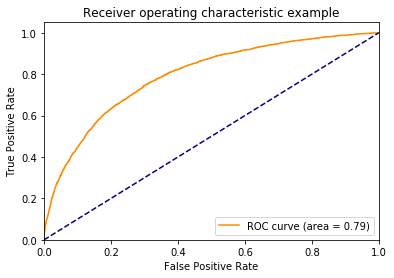

            pred_neg  pred_pos
actual neg     11252      1925
actualpos       2100      2538
Training model :  RandomForestClassifier
ratio :  0.2541019102150796
13172


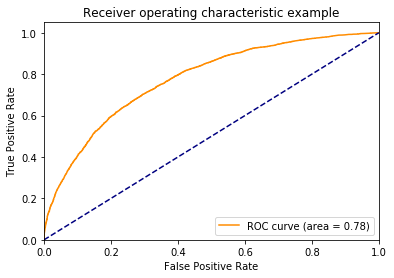

            pred_neg  pred_pos
actual neg     11021      2156
actualpos       2155      2483
Training model :  XGBClassifier
ratio :  0.2541019102150796
14651


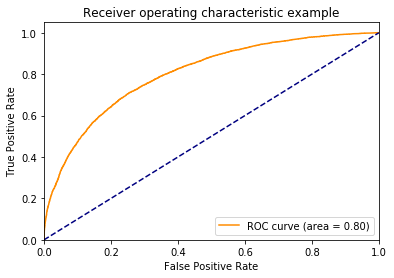

            pred_neg  pred_pos
actual neg     11265      1912
actualpos       2014      2624
Training model :  LGBMClassifier
ratio :  0.2541019102150796
10432


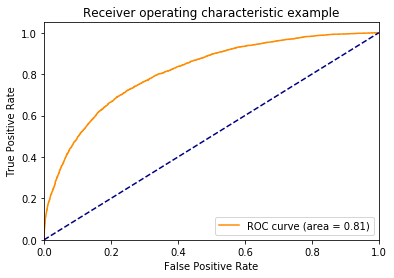

            pred_neg  pred_pos
actual neg     11312      1865
actualpos       1960      2678


,model,roc_auc_train,roc_auc_test,precision_tr,precision_te,recall_tr,recall_te,f1_score_tr,f1_score_te
0,LogisticRegression,0.791377,0.793358,0.551231,0.568676,0.551127,0.547219,0.551179,0.557741
0,RandomForestClassifier,0.824654,0.775726,0.603883,0.535245,0.603768,0.535360,0.603825,0.535302
0,XGBClassifier,0.808699,0.802389,0.573769,0.578483,0.573660,0.565761,0.573715,0.572051
0,LGBMClassifier,0.852576,0.812875,0.630398,0.589478,0.630278,0.577404,0.630338,0.583379


In [0]:
X = data.drop(columns='Response')
y = data['Response']   # Harus Series
mod = modeling(X)
X = mod.data_preprocess(fill_na_numer=1)
X.head()

model=all_model
a=mod.fit_modeling(X=X,y=y,model=model)
a

Training model :  LogisticRegression
ratio :  0.2541019102150796
12025


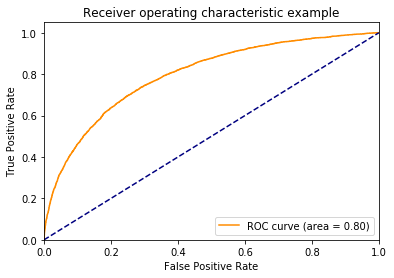

            pred_neg  pred_pos
actual neg     11240      1937
actualpos       2079      2559
Training model :  RandomForestClassifier
ratio :  0.2541019102150796
14394


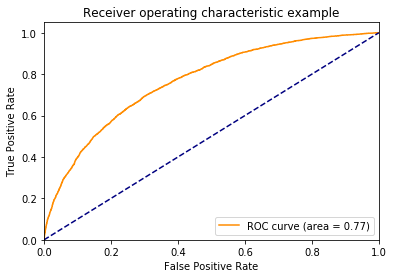

            pred_neg  pred_pos
actual neg     11037      2140
actualpos       2243      2395
Training model :  XGBClassifier
ratio :  0.2541019102150796
14616


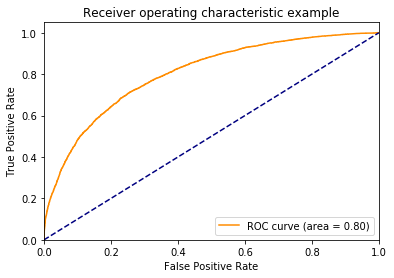

            pred_neg  pred_pos
actual neg     11257      1920
actualpos       2021      2617
Training model :  LGBMClassifier
ratio :  0.2541019102150796
10334


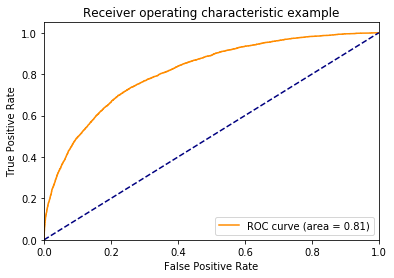

            pred_neg  pred_pos
actual neg     11315      1862
actualpos       1987      2651


,model,roc_auc_train,roc_auc_test,precision_tr,precision_te,recall_tr,recall_te,f1_score_tr,f1_score_te
0,LogisticRegression,0.801386,0.795797,0.563826,0.569173,0.563719,0.551746,0.563772,0.560324
0,RandomForestClassifier,0.795553,0.766097,0.557386,0.528115,0.557281,0.516386,0.557334,0.522185
0,XGBClassifier,0.808808,0.802887,0.575168,0.576813,0.574134,0.564252,0.574651,0.570463
0,LGBMClassifier,0.852621,0.812928,0.632576,0.587414,0.632456,0.571583,0.632516,0.579390


In [0]:
X = data_categ.drop(columns='Response')
y = data_categ['Response']   # Harus Series
mod = modeling(X)
X = mod.data_preprocess(fill_na_numer=1)
X.head()

model=all_model
a=mod.fit_modeling(X=X,y=y,model=model)
a

Training model :  LogisticRegression
ratio :  0.2541019102150796
11847


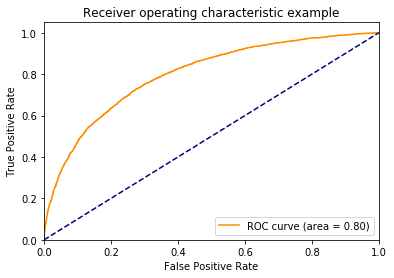

            pred_neg  pred_pos
actual neg     11277      1900
actualpos       2051      2587
Training model :  RandomForestClassifier
ratio :  0.2541019102150796
13825


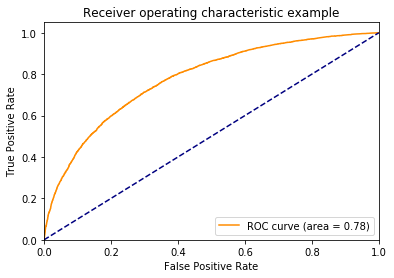

            pred_neg  pred_pos
actual neg     11071      2106
actualpos       2138      2500
Training model :  XGBClassifier
ratio :  0.2541019102150796
14066


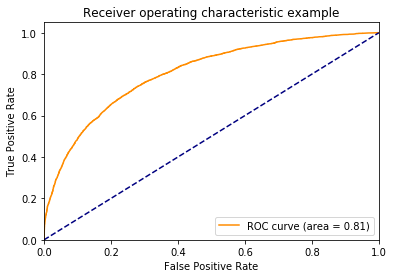

            pred_neg  pred_pos
actual neg     11273      1904
actualpos       1987      2651
Training model :  LGBMClassifier
ratio :  0.2541019102150796
10137


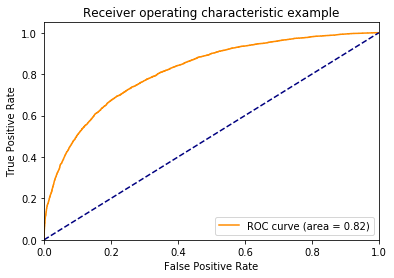

            pred_neg  pred_pos
actual neg     11284      1893
actualpos       1911      2727


,model,roc_auc_train,roc_auc_test,precision_tr,precision_te,recall_tr,recall_te,f1_score_tr,f1_score_te
0,LogisticRegression,0.806186,0.798710,0.571117,0.576554,0.571009,0.557784,0.571063,0.567014
0,RandomForestClassifier,0.808306,0.778458,0.577936,0.542770,0.577826,0.539025,0.577881,0.540891
0,XGBClassifier,0.812580,0.806425,0.581913,0.581998,0.581803,0.571583,0.581858,0.576743
0,LGBMClassifier,0.856283,0.816255,0.641098,0.590260,0.640977,0.587969,0.641038,0.589112


In [0]:
X = data_categ_ori.drop(columns='Response')
y = data_categ_ori['Response']   # Harus Series
mod = modeling(X)
X = mod.data_preprocess(fill_na_numer=1)
X.head()

model=all_model
a=mod.fit_modeling(X=X,y=y,model=model)
a

Training model :  LogisticRegression
ratio :  0.2541019102150796
12150


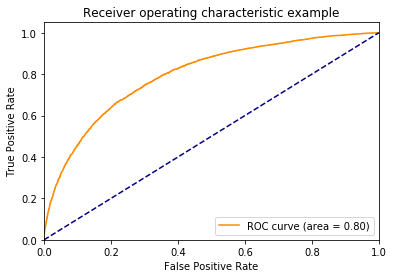

            pred_neg  pred_pos
actual neg     11248      1929
actualpos       2057      2581
Training model :  RandomForestClassifier
ratio :  0.2541019102150796
12616


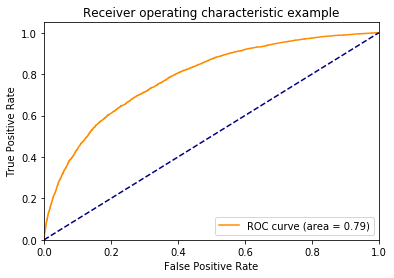

            pred_neg  pred_pos
actual neg     11149      2028
actualpos       2085      2553
Training model :  XGBClassifier
ratio :  0.2541019102150796
14659


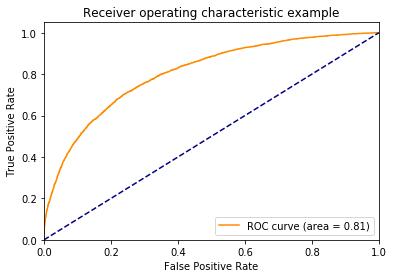

            pred_neg  pred_pos
actual neg     11292      1885
actualpos       1986      2652
Training model :  LGBMClassifier
ratio :  0.2541019102150796
10283


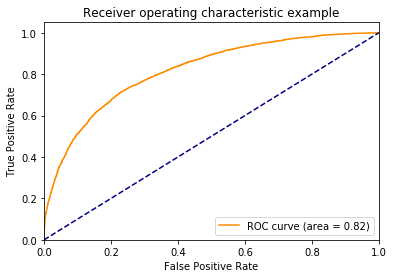

            pred_neg  pred_pos
actual neg     11344      1833
actualpos       1913      2725


,model,roc_auc_train,roc_auc_test,precision_tr,precision_te,recall_tr,recall_te,f1_score_tr,f1_score_te
0,LogisticRegression,0.796825,0.797080,0.560985,0.572284,0.560879,0.556490,0.560932,0.564276
0,RandomForestClassifier,0.820004,0.785191,0.594584,0.557302,0.594584,0.550453,0.594584,0.553856
0,XGBClassifier,0.813199,0.806802,0.581439,0.584527,0.581329,0.571798,0.581384,0.578093
0,LGBMClassifier,0.855616,0.816619,0.638421,0.597850,0.638421,0.587538,0.638421,0.592649


In [0]:
X = data_ori.drop(columns='Response')
y = data_ori['Response']   # Harus Series
mod = modeling(X)
X = mod.data_preprocess(fill_na_numer=1)
X.head()

model=all_model
a=mod.fit_modeling(X=X,y=y,model=model)
a

In [0]:
# data_2 = data.copy()
# data_2.drop(columns=categ_age_bmi_dkk,inplace=True)

# X = data_2.drop(columns='Response')
# y = data_2['Response']   # Harus Series
# mod = modeling(X)
# X = mod.data_preprocess(fill_na_numer=1)
# X.head()

# model=all_model
# a=mod.fit_modeling(X=X,y=y,model=model)
# a

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix


param_grid = {
    'num_leaves': [20, 25,31], 
    'class_weight' : ['balanced',{0:1,1:10},{0:0.5,1:5},{0:1,1:3.5}],
    'n_estimators':[50,100]
}

scorers = {
    'AUC': 'roc_auc',
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}



def grid_search_wrapper(X,y,model,refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
      
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(model, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [0]:
model = LGBMClassifier(n_jobs=-1)
gs = grid_search_wrapper(X,y,model,refit_score='AUC')

Best params for AUC
{'class_weight': 'balanced', 'n_estimators': 100, 'num_leaves': 31}

Confusion matrix of Random Forest optimized for AUC on the test data:
     pred_neg  pred_pos
neg      6675      2119
pos       872      2211


10557


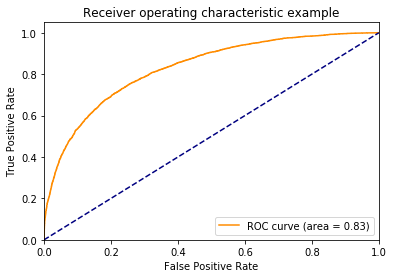

            pred_neg  pred_pos
actual neg     11375      1802
actualpos       1833      2805


,model,roc_auc_train,roc_auc_test,precision_tr,precision_te,recall_tr,recall_te,f1_score_tr,f1_score_te
0,modeling,0.851719,0.828478,0.633996,0.608856,0.633876,0.604787,0.633936,0.606814


In [0]:

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=1)

real_train=ytrain.to_list()
proba_train=gs.predict_proba(xtrain)[:,1]


from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(real_train), proba_train)
roc_auc_train = auc(false_positive_rate, true_positive_rate)
print(len(thresholds))

p, r, t = precision_recall_curve(np.array(real_train), proba_train)


best_thres = t[p.tolist().index(max(p[np.abs(p-r)<=0.0001]))]


  # f0=0
  # for thres in t:
  #   f1 = f1_score(real_train, np.where(proba_train>thres,1,0), average="macro")
  #   if f1>f0:
  #     best_thres=thres
  #     f0=f1
  
f1_score_tr = f1_score(real_train, np.where(proba_train>best_thres,1,0), average="binary")
precision_tr = precision_score(real_train, np.where(proba_train>best_thres,1,0), average="binary")
recall_tr = recall_score(real_train, np.where(proba_train>best_thres,1,0), average="binary")

proba_test=gs.predict_proba(xtest)[:,1]
real_test = ytest

false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(real_test), proba_test)
roc_auc_test = auc(false_positive_rate, true_positive_rate)


f1_score_te = f1_score(real_test, np.where(proba_test>best_thres,1,0), average="binary")
precision_te = precision_score(real_test, np.where(proba_test>best_thres,1,0), average="binary")
recall_te = recall_score(real_test, np.where(proba_test>best_thres,1,0), average="binary")

res = pd.DataFrame()
res['model']=[mod.__class__.__name__]
res['roc_auc_train']=[roc_auc_train]
res['roc_auc_test']=[roc_auc_test]
res['precision_tr'] = [precision_tr]
res['precision_te'] = [precision_te]
res['recall_tr'] = [recall_tr]
res['recall_te'] = [recall_te]
res['f1_score_tr'] = [f1_score_tr]
res['f1_score_te'] = [f1_score_te]




plt.plot(false_positive_rate,true_positive_rate,color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

conf_mat = confusion_matrix(real_test, np.where(proba_test>best_thres,1,0))
print(pd.DataFrame(conf_mat,
            columns=['pred_neg', 'pred_pos'], index=['actual neg', 'actualpos']))

res

## Modeling LGBM data awal

AUC LGBM train 0.8518048489366374


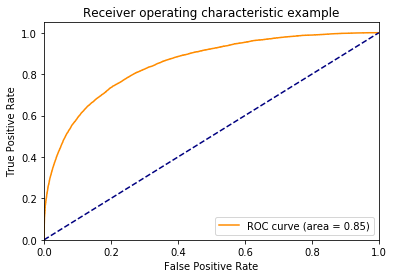

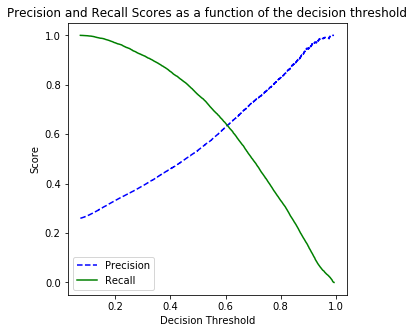

0.6355533547907898
0.6066819548676512
[0.63550091 0.63555335 0.63552328]


--------------------------------- TESTING -------------------------------------------


AUC LGBM train 0.8162945004743674


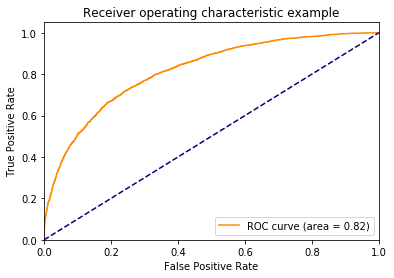

F1 Score :  0.5872656755009695
Prec Score :  0.5851851851851851
Rec Score :  0.5893610120012974


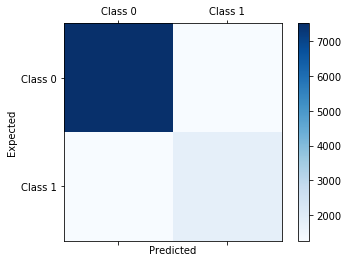

            pred_neg  pred_pos
actual neg      7506      1288
actualpos       1266      1817


In [0]:
ratio = y.value_counts().values[0]/y.value_counts().values[1]
model = LGBMClassifier(lnum_leaves=31,class_weight= 'balanced')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

model.fit(X_train,y_train)
proba_train = model.predict_proba(X_train)[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(y_train).astype('int'), proba_train.astype('float32'))
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC LGBM train',roc_auc)

plt.plot(false_positive_rate,true_positive_rate,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train, proba_train)
plt.figure(figsize=(5, 5))
plt.title("Precision and Recall Scores as a function of the decision threshold")
plt.plot(thresholds, p[:-1], "b--", label="Precision")
plt.plot(thresholds, r[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')
plt.show()

best_thres = thresholds[p.tolist().index(max(p[np.abs(p-r)<=0.0001]))]

print(max(p[np.abs(p-r)<=0.0001]))
print(best_thres)
print(p[np.abs(p-r)<=0.0001])

print('\n\n--------------------------------- TESTING -------------------------------------------\n\n')

proba_test = model.predict_proba(X_test)[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(y_test).astype('int'), proba_test.astype('float32'))
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC LGBM train',roc_auc)

plt.plot(false_positive_rate,true_positive_rate,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()


print('F1 Score : ',f1_score(y_test, np.where(proba_test>best_thres,1,0), average="binary"))
print('Prec Score : ',precision_score(y_test, np.where(proba_test>best_thres,1,0), average="binary"))
print('Rec Score : ',recall_score(y_test, np.where(proba_test>best_thres,1,0), average="binary"))

conf_mat = confusion_matrix(y_true=y_test, y_pred=np.where(proba_test>best_thres,1,0))
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

print(pd.DataFrame(conf_mat,
          columns=['pred_neg', 'pred_pos'], index=['actual neg', 'actualpos']))

## Modeling LGBM data ubah sesuai dengan categoric

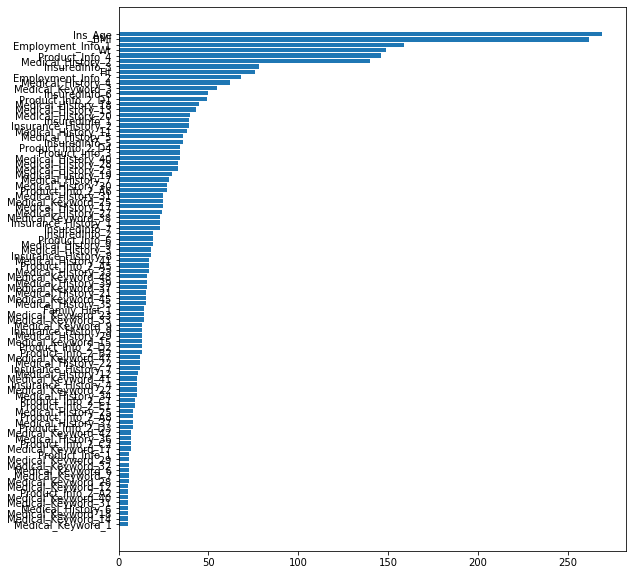

In [0]:
f=plt.figure(figsize=(20,10))
f.add_subplot(1,2,1)
feature_imp = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
plt.barh(feature_imp.index[:92],feature_imp[:92])
keep_fe = feature_imp[feature_imp>20].index
plt.gca().invert_yaxis()

In [0]:
X_train_2 = X_train[keep_fe]
X_test_2 = X_test[keep_fe]

In [0]:
print(len(keep_fe))
print(X_train.shape[1])
feature_imp[feature_imp<=10].index

37
131


Index(['Medical_Keyword_41', 'Insurance_History_4', 'Medical_Keyword_22',
       'Medical_History_34', 'Product_Info_2_C1', 'Product_Info_2_E1',
       'Medical_History_25', 'Product_Info_2_A8', 'Medical_History_37',
       'Product_Info_2_D3', 'Medical_Keyword_42', 'Medical_History_36',
       'Product_Info_2_C2', 'Medical_Keyword_17', 'Product_Info_1',
       'Medical_Keyword_29', 'Medical_Keyword_32', 'Medical_Keyword_6',
       'Medical_Keyword_7', 'Medical_Keyword_28', 'Medical_Keyword_12',
       'Product_Info_2_A2', 'Medical_Keyword_40', 'Medical_Keyword_31',
       'Medical_History_6', 'Medical_Keyword_18', 'Medical_Keyword_14',
       'Medical_Keyword_1', 'Medical_History_14', 'Medical_History_16',
       'Medical_Keyword_2', 'Medical_Keyword_35', 'Insurance_History_3',
       'Medical_Keyword_39', 'Medical_Keyword_26', 'InsuredInfo_4',
       'Medical_History_8', 'Medical_Keyword_21', 'Medical_Keyword_19',
       'Product_Info_7', 'Employment_Info_5', 'Medical_Keyword_8',
   

In [0]:
for i in keep_fe:
  print(i)

Ins_Age
BMI
Employment_Info_1
Wt
Product_Info_4
Medical_History_2
InsuredInfo_3
Ht
Employment_Info_2
Medical_History_4
Medical_Keyword_3
InsuredInfo_6
Product_Info_2_D1
Medical_History_18
Medical_History_13
Medical_History_20
InsuredInfo_1
Insurance_History_2
Medical_History_11
Medical_History_5
InsuredInfo_5
Product_Info_2_D4
Product_Info_3
Medical_History_40
Medical_History_28
Medical_History_23
Medical_History_19
Medical_History_7
Medical_History_30
Product_Info_2_A6
Medical_History_31
Medical_Keyword_25
Medical_History_17
Medical_History_27
Medical_Keyword_38
Insurance_History_1
InsuredInfo_7


AUC LGBM train 0.8439935959032677


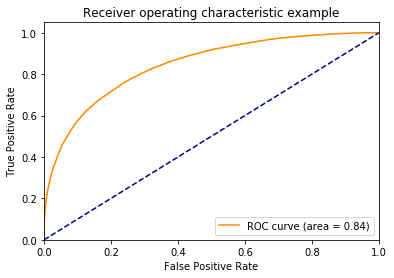

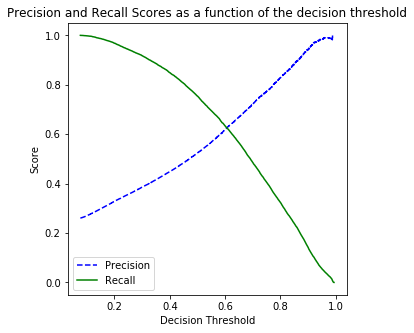

0.6258666226477385
0.6065373703490746
[0.62576333 0.62581497 0.62586662]


--------------------------------- TESTING -------------------------------------------


AUC LGBM train 0.8122265453747952


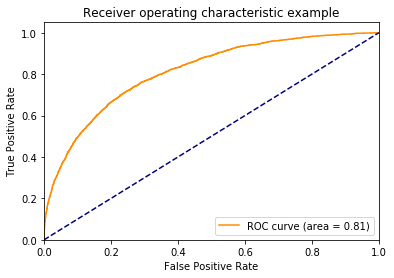

F1 Score :  0.5812408877369187
Prec Score :  0.5805825242718446
Rec Score :  0.5819007460265975


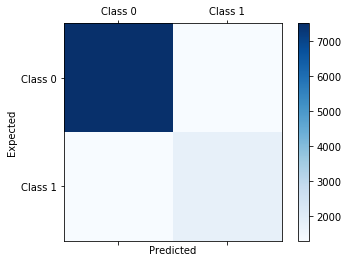

            pred_neg  pred_pos
actual neg      7498      1296
actualpos       1289      1794


In [0]:
ratio = y.value_counts().values[0]/y.value_counts().values[1]
model = LGBMClassifier(learning_rate= 0.1, num_leaves=31,class_weight= 'balanced',n_jobs=-1)


model.fit(X_train_2,y_train)
proba_train = model.predict_proba(X_train_2)[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(y_train).astype('int'), proba_train.astype('float32'))
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC LGBM train',roc_auc)

plt.plot(false_positive_rate,true_positive_rate,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train, proba_train)
plt.figure(figsize=(5, 5))
plt.title("Precision and Recall Scores as a function of the decision threshold")
plt.plot(thresholds, p[:-1], "b--", label="Precision")
plt.plot(thresholds, r[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')
plt.show()

best_thres = thresholds[p.tolist().index(max(p[np.abs(p-r)<=0.0001]))]

print(max(p[np.abs(p-r)<=0.0001]))
print(best_thres)
print(p[np.abs(p-r)<=0.0001])

print('\n\n--------------------------------- TESTING -------------------------------------------\n\n')

proba_test = model.predict_proba(X_test_2)[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(y_test).astype('int'), proba_test.astype('float32'))
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC LGBM train',roc_auc)

plt.plot(false_positive_rate,true_positive_rate,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()


print('F1 Score : ',f1_score(y_test, np.where(proba_test>best_thres,1,0), average="binary"))
print('Prec Score : ',precision_score(y_test, np.where(proba_test>best_thres,1,0), average="binary"))
print('Rec Score : ',recall_score(y_test, np.where(proba_test>best_thres,1,0), average="binary"))

conf_mat = confusion_matrix(y_true=y_test, y_pred=np.where(proba_test>best_thres,1,0))
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

print(pd.DataFrame(conf_mat,
          columns=['pred_neg', 'pred_pos'], index=['actual neg', 'actualpos']))

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn.base import clone

def validation_cv(model,X,y,n_split=2):
  kf = skf = StratifiedKFold(n_splits=5)
  minority = y.value_counts().sort_values().index.values[0]
  majority = y.value_counts().sort_values().index.values[1]
  print('majority class:', majority)
  print('minority class:', minority)
  
  for train,test in kf.split(X,y):
    print('Fold : ',i)
    xtrain = X.iloc[:,train]
    ytrain = y.iloc[train]
    
    xtest = X.iloc
    ytest = pd.concat([y_min, y_maj_sub])
    
    print('Ratio : {}%'.format(str(y_sub.value_counts().values[1]*100/y_sub.shape[0])))

    estimators_cv=[]
    auc_df = pd.DataFrame()
    
    SKF = StratifiedKFold(3,shuffle=True,random_state=1)
    from sklearn.model_selection import cross_validate
    from sklearn import metrics
    scoring = ['precision_macro', 'recall_macro','f1_macro','roc_auc']
    scores = cross_validate(model, X_sub, y_sub, cv=SKF,scoring=scoring,verbose=0,)
    print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
    print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
    print("f1 score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))
    print("roc_auc score: %0.2f (+/- %0.2f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std() * 2))
    
    i+=1

In [0]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-cp36-none-any.whl size=19879 sha256=baf33f8cf9a30ba8f8bb2cc36ba4f8f986fc733761b9fe179b88c9662321482a
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


ratio :  0.25507325698888517
task:         [classification]
n_classes:    [2]
metric:       [auc_2]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LogisticRegression]
    fold  0:  [0.78814313]
    fold  1:  [0.80116675]
    fold  2:  [0.79254304]
    fold  3:  [0.78837676]
    ----
    MEAN:     [0.79255742] + [0.00526983]
    FULL:     [0.79247116]

model  1:     [RandomForestClassifier]
    fold  0:  [0.77685796]
    fold  1:  [0.78315648]
    fold  2:  [0.77891820]
    fold  3:  [0.77460004]
    ----
    MEAN:     [0.77838317] + [0.00315076]
    FULL:     [0.77814215]

model  2:     [XGBClassifier]
    fold  0:  [0.80158723]
    fold  1:  [0.81225957]
    fold  2:  [0.80173781]
    fold  3:  [0.79982253]
    ----
    MEAN:     [0.80385179] + [0.00491230]
    FULL:     [0.80377832]

AUC XGB train 0.8302203425699757


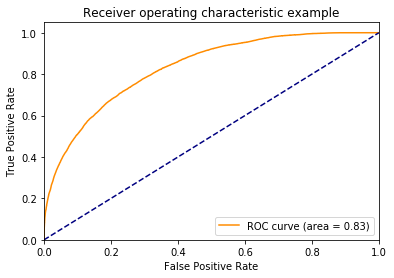

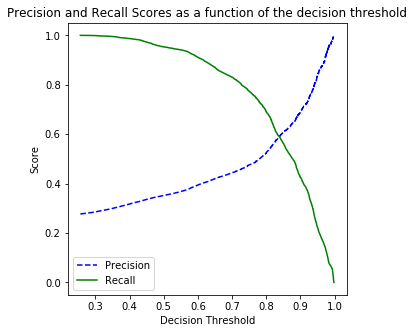

[0.58973513 0.58978379 0.58983247 0.58988115 0.5898473 ]
0.8385440268625896


--------------------------------- TESTING -------------------------------------------


AUC XGB train 0.8048112965294725


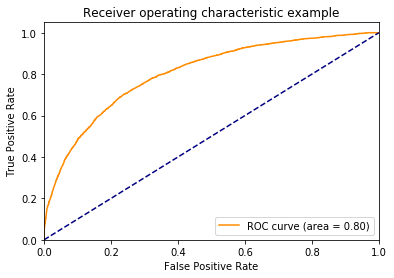

F1 Score :  0.5708210664049722
Prec Score :  0.5757175849554602
Rec Score :  0.5660071359065845


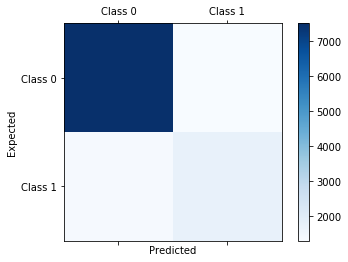

            pred_neg  pred_pos
actual neg      7508      1286
actualpos       1338      1745


In [0]:
from vecstack import stacking

print("ratio : ",str(y_train[y_train==1].shape[0]/y_train.shape[0]))

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
      

def auc_2(y_true, y_pred):
    """ROC AUC metric for both binary and multiclass classification.
    
    Parameters
    ----------
    y_true : 1d numpy array
        True class labels
    y_pred : 2d numpy array
        Predicted probabilities for each class
    """
    auc_score = roc_auc_score(y_true, y_pred[:,1])
    return auc_score

def f1_2(y_true, y_pred):
    """ROC AUC metric for both binary and multiclass classification.
    
    Parameters
    ----------
    y_true : 1d numpy array
        True class labels
    y_pred : 2d numpy array
        Predicted probabilities for each class
    """
    f1_2 = f1_score(y_true, np.where(y_pred[:,1]>0.2,1,0))
    return f1_2

models = [
    LogisticRegression(class_weight= 'balanced',penalty = 'l2',C=0.9,n_jobs=-1),
        
    RandomForestClassifier(n_jobs=-1, max_depth=10,max_features='auto',class_weight= 'balanced'),
        
    XGBClassifier(learning_rate= 0.1,class_weight= 'balanced')
]






S_train, S_test = stacking(models,                   
                            X_train_2, y_train, X_test_2,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=True,
         
                           save_dir=None, 
            
                           metric=auc_2, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)



model = LGBMClassifier(learning_rate= 0.1, num_leaves=31,class_weight= {0: 1, 1: 10})


# from imblearn.over_sampling import SMOTE
        
# s = SMOTE(sampling_strategy=0.15, random_state = 1)
# S_train, y_train = s.fit_sample(S_train,y_train)
# y_train =pd.Series(y_train)



model = model.fit(S_train, y_train)
proba_train = model.predict_proba(S_train)[:,1]



false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(y_train).astype('int'), proba_train.astype('float32'))
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC XGB train',roc_auc)

plt.plot(false_positive_rate,true_positive_rate,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train, proba_train)
plt.figure(figsize=(5, 5))
plt.title("Precision and Recall Scores as a function of the decision threshold")
plt.plot(thresholds, p[:-1], "b--", label="Precision")
plt.plot(thresholds, r[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')
plt.show()

p, r, thresholds = precision_recall_curve(y_train, proba_train)
best_thres = thresholds[p.tolist().index(max(p[np.abs(p-r)<=0.0001]))]

print(p[np.abs(p-r)<=0.0001])
print(best_thres)


print('\n\n--------------------------------- TESTING -------------------------------------------\n\n')

proba_test = model.predict_proba(S_test)[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(y_test).astype('int'), proba_test.astype('float32'))
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC XGB train',roc_auc)

plt.plot(false_positive_rate,true_positive_rate,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()


print('F1 Score : ',f1_score(y_test, np.where(proba_test>best_thres,1,0), average="binary"))
print('Prec Score : ',precision_score(y_test, np.where(proba_test>best_thres,1,0), average="binary"))
print('Rec Score : ',recall_score(y_test, np.where(proba_test>best_thres,1,0), average="binary"))


conf_mat = confusion_matrix(y_true=y_test, y_pred=np.where(proba_test>best_thres,1,0))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


print(pd.DataFrame(conf_mat,
          columns=['pred_neg', 'pred_pos'], index=['actual neg', 'actualpos']))

In [6]:
!pip install scorecardpy

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.1.1-cp36-none-any.whl size=58169 sha256=ca485d34e1e7d9f0a4be7c1e27cd022e65c485112231db09c3c3c93cbdaf2b3c
  Stored in directory: /root/.cache/pip/wheels/8f/4c/98/567ff70984acd88ffae211d8fc209e34b98fb43ff27f09fdd3
Successfully built scorecardpy


[INFO] filtering variables ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


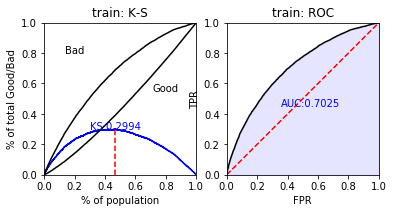

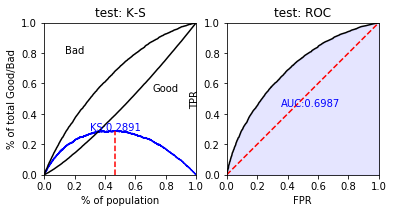

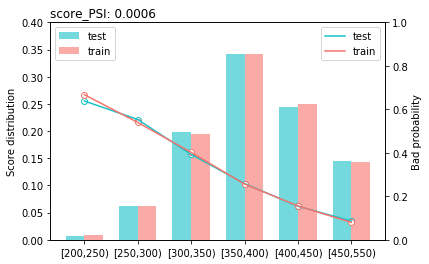

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.000613}

In [49]:
data_s = data_ori.iloc[:,:10].copy()
data_s['Response']=data_ori['Response'].copy()
# Traditional Credit Scoring Using Logistic Regression


import scorecardpy as sc

# data prepare ------
# load germancredit data
dat = data_s.copy()

# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(dat, y="Response")

# breaking dt into train and test
train, test = sc.split_df(dt_s, 'Response').values()

# woe binning ------
bins = sc.woebin(dt_s, y="Response")
# sc.woebin_plot(bins)

# binning adjustment
# # adjust breaks interactively
# breaks_adj = sc.woebin_adj(dt_s, "creditability", bins) 
# # or specify breaks manually
# breaks_adj = {
#     'age.in.years': [26, 35, 40],
#     'other.debtors.or.guarantors': ["none", "co-applicant%,%guarantor"]
# }
# bins_adj = sc.woebin(dt_s, y="creditability", breaks_list=breaks_adj)

# converting train and test into woe values
train_woe = sc.woebin_ply(train,bins)
test_woe = sc.woebin_ply(test,bins)


y_train = train_woe.loc[:,'Response']
X_train = train_woe.loc[:,train_woe.columns != 'Response']
y_test = test_woe.loc[:,'Response']
X_test = test_woe.loc[:,train_woe.columns != 'Response']
col_x = X_train.columns

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(sampling_strategy=0.15, random_state = 1)
# X_train, y_train = rus.fit_sample(X_train,y_train)
# y_train =pd.Series(y_train)
# X_train = pd.DataFrame(X_train,columns=col_x)
# print("ratio : ",str(y_train[y_train==1].shape[0]/y_train.shape[0]))

# logistic regression ------
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1,class_weight = {0:1,1:3.5},fit_intercept=True)
lr.fit(X_train, y_train)
# lr.coef_
# lr.intercept_

# predicted proability
proba_train = lr.predict_proba(X_train)[:,1]
proba_test= lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train, proba_train, title = "train")
test_perf = sc.perf_eva(y_test, proba_test, title = "test")

# score ------
card = sc.scorecard(bins, lr, X_train.columns,basepoints_eq0=True)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [69]:
pd.concat((bins['Ht'],bins['Wt'],bins['Ins_AgeA']))

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Ht,"[-inf,0.7)",27187,0.457840,20890,6297,0.231618,-0.132198,0.007740,0.014620,0.7,False
1,Ht,"[0.7,0.7999999999999999)",24612,0.414476,17904,6708,0.272550,0.085276,0.003076,0.014620,0.7999999999999999,False
2,Ht,"[0.7999999999999999,inf)",7582,0.127684,5387,2195,0.289501,0.169193,0.003803,0.014620,inf,False
0,Wt,"[-inf,0.2)",8844,0.148937,7379,1465,0.165649,-0.549783,0.038834,0.191321,0.2,False
1,Wt,"[0.2,0.30000000000000004)",25781,0.434162,20216,5565,0.215857,-0.222978,0.020392,0.191321,0.30000000000000004,False
2,Wt,"[0.30000000000000004,0.4)",18026,0.303565,13072,4954,0.274825,0.096722,0.002906,0.191321,0.4,False
3,Wt,"[0.4,inf)",6730,0.113336,3514,3216,0.477860,0.978383,0.129188,0.191321,inf,False
0,Ins_Age,"[-inf,0.4)",28630,0.482141,22906,5724,0.199930,-0.319732,0.045363,0.118261,0.4,False
1,Ins_Age,"[0.4,0.6000000000000001)",19479,0.328034,14171,5308,0.272499,0.085017,0.002420,0.118261,0.6000000000000001,False
2,Ins_Age,"[0.6000000000000001,0.7000000000000001)",7143,0.120291,4773,2370,0.331793,0.366914,0.017571,0.118261,0.7000000000000001,False


In [64]:
train.head()

,Ins_Age,Product_Info_2,Product_Info_4,Ht,Product_Info_3,Wt,Response
1,0.059701,A1,0.076923,0.600000,26,0.131799,1
3,0.164179,D4,0.487179,0.672727,10,0.205021,0
5,0.507463,D2,0.230769,0.836364,26,0.299163,0
8,0.522388,D3,0.230769,0.618182,26,0.184100,0
10,0.537313,D3,0.128205,0.690909,26,0.309623,0


In [51]:
data_s.columns

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt', 'Response'],
      dtype='object')

In [70]:
train_woe[['Ht_woe','Ins_Age_woe','Wt_woe']].head(10)

,Ht_woe,Ins_Age_woe,Wt_woe
1,-0.132198,-0.319732,-0.549783
3,-0.132198,-0.319732,-0.222978
5,0.169193,0.085017,-0.222978
8,-0.132198,0.085017,-0.549783
10,-0.132198,0.085017,0.096722
11,-0.132198,-0.319732,-0.222978
12,-0.132198,0.085017,-0.549783
13,0.085276,-0.319732,0.096722
14,-0.132198,-0.319732,-0.549783
17,-0.132198,-0.319732,-0.222978


In [53]:
bins

{'Ht':   variable                       bin  ...              breaks  is_special_values
 0       Ht                [-inf,0.7)  ...                 0.7              False
 1       Ht  [0.7,0.7999999999999999)  ...  0.7999999999999999              False
 2       Ht  [0.7999999999999999,inf)  ...                 inf              False
 
 [3 rows x 12 columns], 'Ins_Age':   variable  ... is_special_values
 0  Ins_Age  ...             False
 1  Ins_Age  ...             False
 2  Ins_Age  ...             False
 3  Ins_Age  ...             False
 
 [4 rows x 12 columns], 'Product_Info_2':          variable  ... is_special_values
 0  Product_Info_2  ...             False
 1  Product_Info_2  ...             False
 2  Product_Info_2  ...             False
 3  Product_Info_2  ...             False
 
 [4 rows x 12 columns], 'Product_Info_3':          variable          bin  count  ...  total_iv  breaks  is_special_values
 0  Product_Info_3  [-inf,11.0)   6140  ...  0.012001    11.0              Fal

In [33]:
z = pd.concat((bins['Ht'],bins['Ins_Age'],bins['Wt']))

bins['Ht']['bin'] = bins['Ht']['bin'].replace(bins['Ht']['bin'][0],'low')
bins['Ht']['bin'] = bins['Ht']['bin'].replace(bins['Ht']['bin'][1],'medium')
bins['Ht']['bin'] = bins['Ht']['bin'].replace(bins['Ht']['bin'][2],'high')

bins['Wt']['bin'] = bins['Wt']['bin'].replace(bins['Wt']['bin'][0],'low')
bins['Wt']['bin'] = bins['Wt']['bin'].replace(bins['Wt']['bin'][1],'medium')
bins['Wt']['bin'] = bins['Wt']['bin'].replace(bins['Wt']['bin'][2],'high')

bins['Ins_Age']['bin'] = bins['Ins_Age']['bin'].replace(bins['Ins_Age']['bin'][0],'low')
bins['Ins_Age']['bin'] = bins['Ins_Age']['bin'].replace(bins['Ins_Age']['bin'][1],'medium')
bins['Ins_Age']['bin'] = bins['Ins_Age']['bin'].replace(bins['Ins_Age']['bin'][2],'high')



{'Ht':   variable     bin  count  ...  total_iv              breaks  is_special_values
 0       Ht     low  27187  ...   0.01462                 0.7              False
 1       Ht  medium  24612  ...   0.01462  0.7999999999999999              False
 2       Ht    high   7582  ...   0.01462                 inf              False
 
 [3 rows x 12 columns],
 'Ins_Age':   variable                       bin  ...              breaks  is_special_values
 0  Ins_Age                       low  ...                 0.4              False
 1  Ins_Age                    medium  ...  0.6000000000000001              False
 2  Ins_Age                      high  ...  0.7000000000000001              False
 3  Ins_Age  [0.7000000000000001,inf)  ...                 inf              False
 
 [4 rows x 12 columns],
 'Product_Info_2':          variable  ... is_special_values
 0  Product_Info_2  ...             False
 1  Product_Info_2  ...             False
 2  Product_Info_2  ...             False
 3  Product

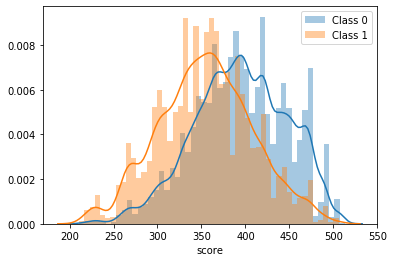

In [71]:
merge_train = pd.concat((train_score,y_train),axis=1)
merge_test = pd.concat((test_score,y_test),axis=1)
merge = pd.concat((merge_train,merge_test),axis=0)
sns.distplot(merge['score'][data['Response']==0],label='Class 0')
sns.distplot(merge['score'][data['Response']==1],label='Class 1')
plt.subplots_adjust(hspace=0.9)
plt.legend()

In [0]:

# false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(y_train).astype('int'), proba_train.astype('float32'))
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print('AUC XGB train',roc_auc)

# plt.plot(false_positive_rate,true_positive_rate,color='darkorange',
#          label='ROC curve (area = %0.2f)' % roc_auc)

# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")

# plt.show()

# from sklearn.metrics import precision_recall_curve
# p, r, thresholds = precision_recall_curve(y_train, proba_train)
# plt.figure(figsize=(5, 5))
# plt.title("Precision and Recall Scores as a function of the decision threshold")
# plt.plot(thresholds, p[:-1], "b--", label="Precision")
# plt.plot(thresholds, r[:-1], "g-", label="Recall")
# plt.ylabel("Score")
# plt.xlabel("Decision Threshold")
# plt.legend(loc='best')
# plt.show()

# p, r, thresholds = precision_recall_curve(y_train, proba_train)
# best_thres = thresholds[p.tolist().index(max(p[np.abs(p-r)<=0.0001]))]

# print(p[np.abs(p-r)<=0.0001])
# print(best_thres)


# print('\n\n--------------------------------- TESTING -------------------------------------------\n\n')

# proba_test = lr.predict_proba(X_test)[:,1]

# false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(y_test).astype('int'), proba_test.astype('float32'))
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print('AUC XGB train',roc_auc)

# plt.plot(false_positive_rate,true_positive_rate,color='darkorange',
#          label='ROC curve (area = %0.2f)' % roc_auc)

# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")

# plt.show()


# print('F1 Score : ',f1_score(y_test, np.where(proba_test>best_thres,1,0), average="binary"))
# print('Prec Score : ',precision_score(y_test, np.where(proba_test>best_thres,1,0), average="binary"))
# print('Rec Score : ',recall_score(y_test, np.where(proba_test>best_thres,1,0), average="binary"))


# conf_mat = confusion_matrix(y_true=y_test, y_pred=np.where(proba_test>best_thres,1,0))

# labels = ['Class 0', 'Class 1']
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
# fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
# plt.xlabel('Predicted')
# plt.ylabel('Expected')
# plt.show()


# print(pd.DataFrame(conf_mat,
#           columns=['pred_neg', 'pred_pos'], index=['actual neg', 'actualpos']))

In [0]:
a = pd.DataFrame()
for i in card:
  b = pd.DataFrame(card[i])
  a = a.append(b)


In [62]:
# a= a.set_index('variable')
a.loc[['Ins_Age','Ht','Wt'],:]


,bin,points
variable,,
Ins_Age,"[-inf,0.4)",68.0
Ins_Age,"[0.4,0.6000000000000001)",61.0
Ins_Age,"[0.6000000000000001,0.7000000000000001)",56.0
Ins_Age,"[0.7000000000000001,inf)",48.0
Ht,"[-inf,0.7)",58.0
Ht,"[0.7,0.7999999999999999)",65.0
Ht,"[0.7999999999999999,inf)",68.0
Wt,"[-inf,0.2)",101.0
Wt,"[0.2,0.30000000000000004)",78.0
